# Some tests
## This is just a "copy paste" of the turorial 
see https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/


In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

(150, 2)


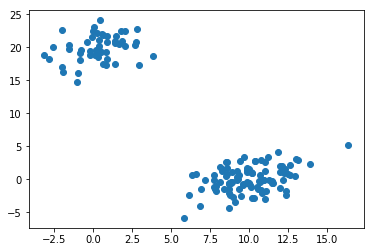

In [3]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
X

array([[  9.21188,  -0.15189],
       [  8.88937,  -0.33937],
       [ 10.7684 ,   2.95245],
       [  8.24213,   1.29095],
       [  5.7967 ,  -5.83777],
       [  6.34993,   0.6396 ],
       [  8.10571,  -0.45887],
       [  8.72085,  -4.40444],
       [  8.83501,  -0.39166],
       [ 10.40061,   2.71241],
       [ 11.95503,   1.98603],
       [  8.50142,   0.5035 ],
       [  9.23359,   1.30693],
       [ 12.27768,   1.62764],
       [ 10.95902,  -0.12752],
       [  8.72437,  -0.73102],
       [  9.64949,   3.41989],
       [ 11.49912,  -0.55113],
       [ 11.48256,  -0.28623],
       [  8.5874 ,   1.66814],
       [ 11.9557 ,  -1.27351],
       [  9.85622,   1.08989],
       [ 10.11831,   1.08458],
       [  7.76042,   0.63747],
       [ 10.99794,  -2.93747],
       [  6.9085 ,  -1.44868],
       [  7.85787,  -0.99148],
       [  6.12508,  -2.44306],
       [ 10.61144,  -0.23623],
       [ 11.09217,  -1.69984],
       [  7.15907,  -0.12267],
       [ 10.73784,  -1.63561],
       [

In [5]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.98001483875742679

In [7]:
Z[0]

array([ 52.     ,  53.     ,   0.04151,   2.     ])

In [8]:
Z[1]

array([ 14.     ,  79.     ,   0.05914,   2.     ])

In [9]:
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

In [10]:
X[[33, 68, 62]]

array([[ 9.83913, -0.4873 ],
       [ 9.89349, -0.44152],
       [ 9.97793, -0.56383]])

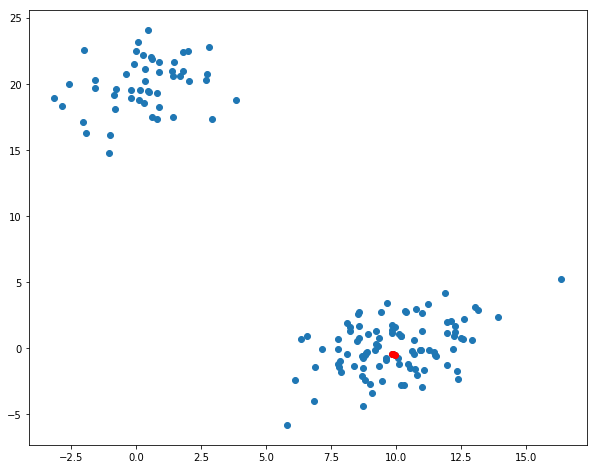

In [11]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

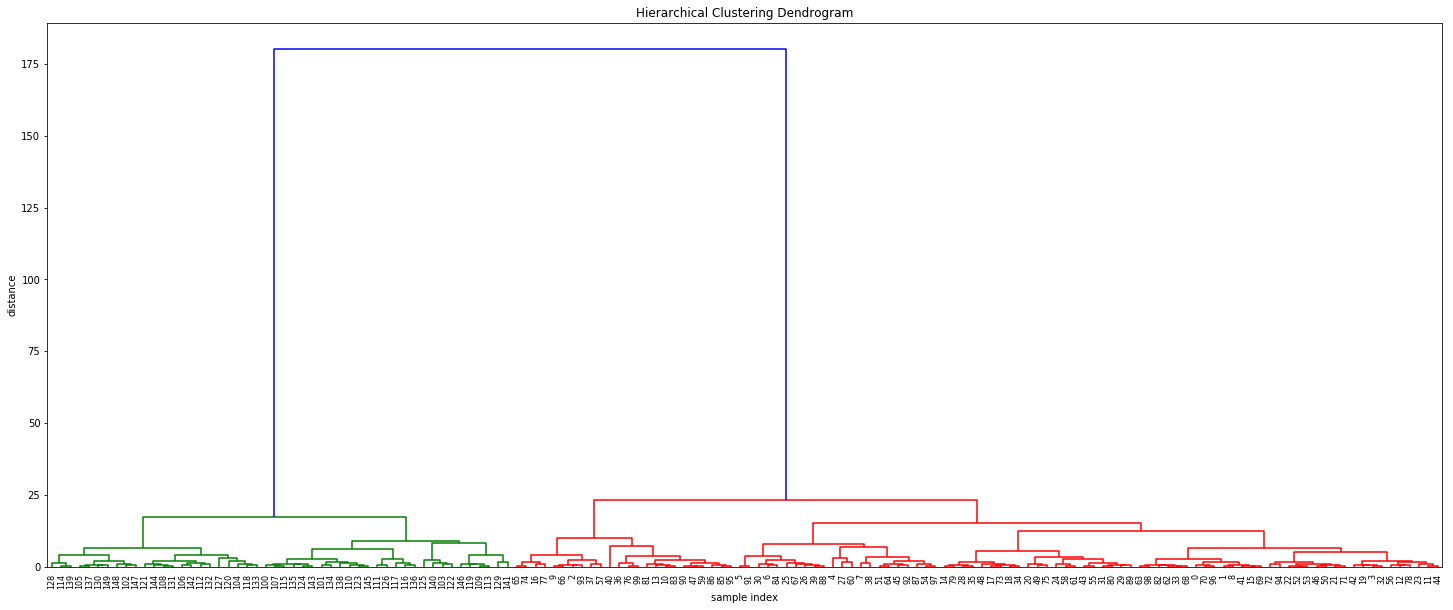

In [12]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

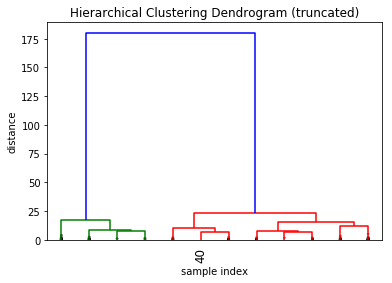

In [13]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

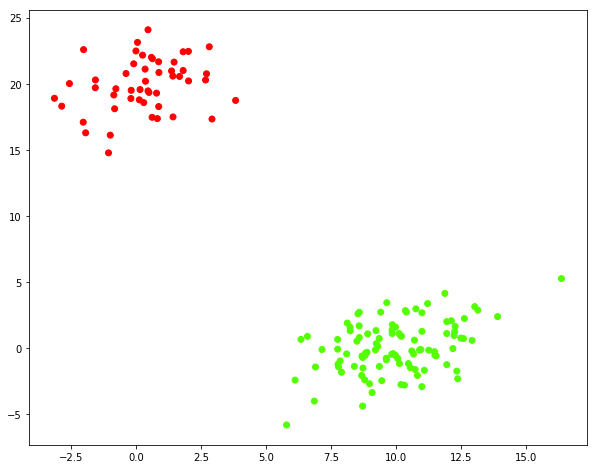

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()